## Pré-processamento

Neste notebook, vamos pré-processar os dados e e filtra-los para os proximos passos do projeto.

### Import's

Importar as bibliotecas que serão utilizadas para a realização do load dos dados.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
from sklearn.preprocessing import LabelEncoder
import mne


# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=512, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=512, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=512, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=512, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

### Carregamento

Carregar as bases de dados no programa e salvar em variáveis.

In [2]:
# Ativa/destiva o uso do Google Drive

if False:
    from google.colab import drive
    drive.mount('/content/drive')
    path = 'drive/MyDrive/'
else:
    path = '../../'

In [3]:
data = np.load(f"{path}datasets/beta/data.npy")
labels = np.load(f"{path}datasets/beta/labels.npy")
channels = list(np.load(f"{path}datasets/beta/channels.npy"))

In [8]:
def print_graphs(data):
    for i in range(0, 84, 3):
        plt.plot(data[i,:])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(0, 84, 3):
        plt.psd(data[i,:], Fs=512)
    plt.title('Domínio da frequência')
    plt.show()

    for i in range(0, 84, 3):
        plt.specgram(data[i,:], Fs=512)
    plt.title('Domínio da frequência')
    plt.show()

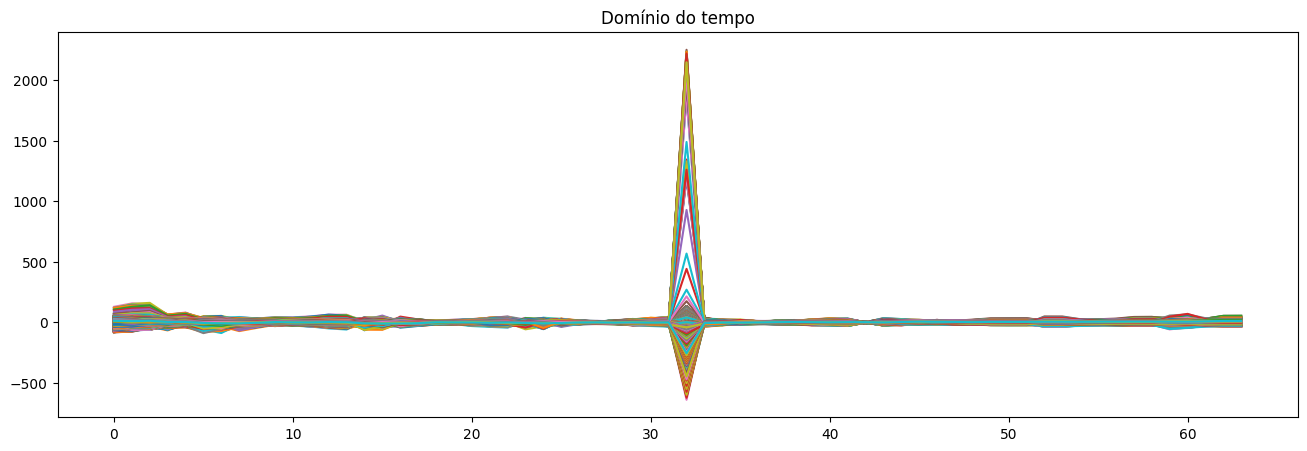

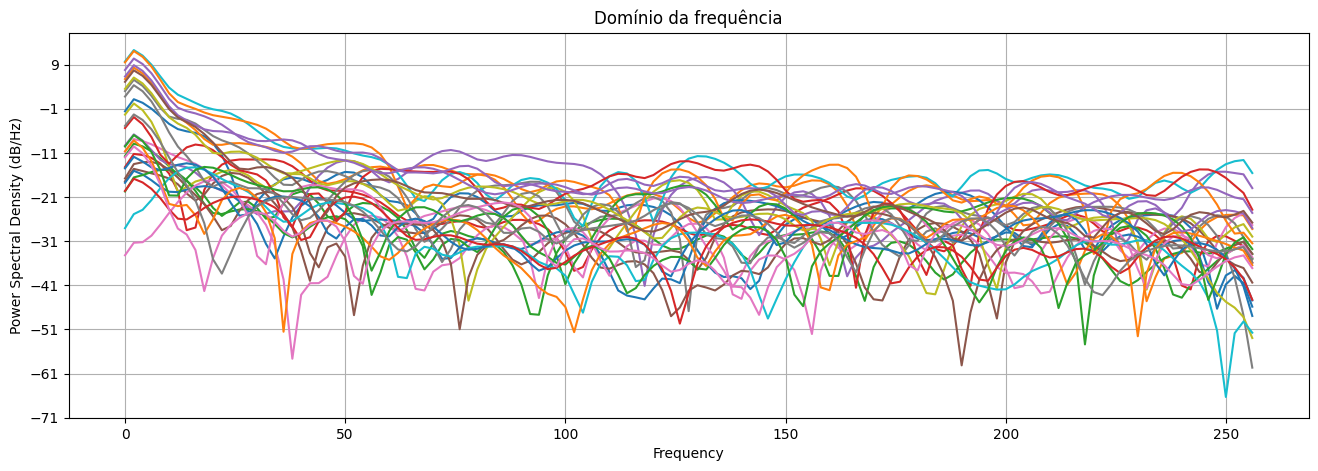

C:\Users\Maria Fernanda\AppData\Local\Temp\ipykernel_12824\3945473603.py:13: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=64).
  plt.specgram(data[i,:], Fs=512)


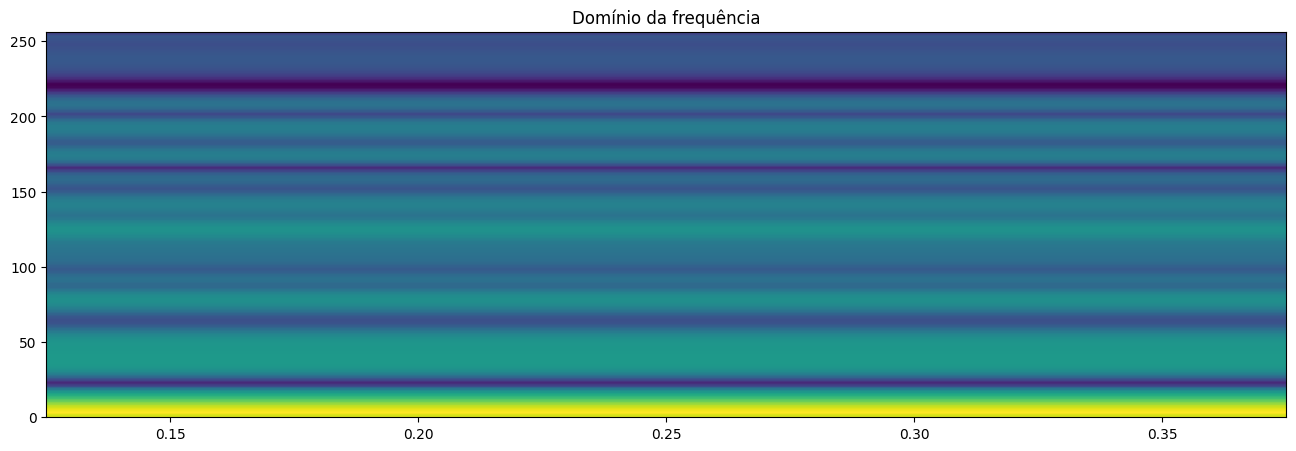

In [9]:
rcParams['figure.figsize'] = [16., 5.]
print_graphs(data)

### Criando um objeto Epoch

Para criar um objeto Epoch, é necessário, primeiro, criar o objeto info, que utiliza a lista de canaais.

In [11]:
ch_types = list()

for channel in channels:
    ch_types.append('eeg')

info = mne.create_info(channels, sfreq=250, ch_types=ch_types)
info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 250.0 Hz
>

Agora vamos ordenar os labels e criar o dicionário de eventos.

In [12]:
unique_labels = sorted(set(labels))

event_dict = dict()

for i in range(len(unique_labels)):
    event_dict[str(unique_labels[i])] = i

Por fim, vamos criar o objeto Epoch, utilizando o objeto info, os dados, o dicionário de eventos.

In [13]:
le = LabelEncoder()
events = np.column_stack((
    np.array(range(len(labels))),
    np.zeros(len(labels), dtype=int),
    le.fit_transform(labels))
)

mne_data = mne.EpochsArray(data, info, events, event_id=event_dict)
# print(mne_data)

Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


### Salvando os Dados Filtrados

Para finalizar vamos salvar os dados filtrados em um arquivo .fif para ser utilizado nos próximos passos do projeto.

In [14]:
# filtrando os dados entre 7 e 17 Hz
filtered_mne_data = mne_data.filter(7, 17)

# salvando os dados filtrados
filtered_mne_data.save(f"{path}datasets/beta/beta_epo.fif", overwrite=True)
# filtered_mne_data

Setting up band-pass filter from 7 - 17 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 17.00 Hz
- Upper transition bandwidth: 4.25 Hz (-6 dB cutoff frequency: 19.12 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Overwriting existing file.


[Parallel(n_jobs=1)]: Done 10240 out of 10240 | elapsed:    2.2s finished
